In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\StudySources\\Master\\ERP\\Datasets\\2011\\combined_output.csv')

In [2]:
df = df[~df['2011 super output area - lower layer'].isna()]

In [9]:
df = df.drop(columns = ['2011 super output area - lower layer', 'mnemonic'])

In [14]:
df.describe

<bound method NDFrame.describe of       Age 16 to 24  Age 25 to 34  Age 35 to 49  Age 50 to 64  Age 65 and over  \
0             83.0         180.0         280.0         177.0             25.0   
1            133.0         209.0         307.0         174.0             18.0   
2            102.0         113.0         387.0         257.0             19.0   
3             99.0         169.0         328.0         225.0             15.0   
4             77.0         114.0         257.0         200.0             26.0   
...            ...           ...           ...           ...              ...   
1705         350.0         534.0          93.0           7.0              1.0   
1706          90.0         282.0         259.0         135.0             13.0   
1707          72.0         315.0         236.0          99.0              9.0   
1708          71.0         180.0         197.0         137.0             12.0   
1709          78.0         144.0         192.0          98.0             11

# Prepare Dataset

In [10]:
df = df.drop(columns=[col for col in df.columns if 'All' in col])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Drop all columns until (and including) travel mode columns
travel_mode_cols = [
    'Underground, metro, light rail, tram', 'Train', 'Bus, minibus or coach',
    'Taxi', 'Motorcycle, scooter or moped', 'Driving a car or van',
    'Passenger in a car or van', 'Bicycle', 'On foot',
    'Other method of travel to work'
]

df0 = df.drop(columns=travel_mode_cols)

# numeric_cols = df0.select_dtypes(include='number').columns
# X = df0[numeric_cols].dropna()

# # Calculate VIF for each numeric column
# vif_data = pd.DataFrame({
#     'feature': numeric_cols,
#     'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# })

# # Show top 10 features with highest VIF
# vif_data_sorted = vif_data.sort_values('VIF', ascending=False)
# print(vif_data_sorted.head(10))

C:\Users\Harry.Xie\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                               feature  VIF
74                               Other household types  inf
77                               1 person in household  inf
89   D Electricity, gas, steam and air conditioning...  inf
88                                     C Manufacturing  inf
87                              B Mining and quarrying  inf
86                 A Agriculture, forestry and fishing  inf
122      4. Administrative and secretarial occupations  inf
84                       8 or more people in household  inf
83                               7 people in household  inf
82                               6 people in household  inf


In [ ]:
# # Show columns where VIF is less than or equal to 5
# non_inf_vif = vif_data[vif_data['VIF'] <= 500]
# print(non_inf_vif[['feature', 'VIF']])

                                               feature         VIF
4                                      Age 65 and over   93.900778
10                                       Less than 2km  346.549782
13                              10km to less than 20km  299.239838
14                              20km to less than 30km   34.701930
15                              30km to less than 40km   11.013857
16                              40km to less than 60km   13.206875
17                                       60km and over   21.692366
18                         Work mainly at or from home  115.364675
50                            Other ethnic group: Arab   19.024221
67   One family only: Married or same-sex civil par...  363.280430
70     One family only: Cohabiting couple: No children  429.056326
71   One family only: Cohabiting couple: Dependent ...  344.064782
73    One family only: Lone parent: Dependent children  257.657278
75      Other household types: With dependent children   69.91

In [11]:
df['Rail Transit'] = df['Underground, metro, light rail, tram'] + df['Train']
df['Active Transit'] = df['Motorcycle, scooter or moped'] + df['Bicycle'] + df['On foot']
df['Public Transit'] = df['Rail Transit'] + df['Bus, minibus or coach'] + df['Taxi']
df['Cars'] = df['Driving a car or van'] + df['Passenger in a car or van']
transit_methods_general = ['Public Transit', 'Active Transit', 'Cars', 'Work mainly at or from home']
transit_method = ['Rail Transit', 'Bus, minibus or coach', 'Taxi', 'Motorcycle, scooter or moped', 'Bicycle', 'On foot', 'Cars', 'Work mainly at or from home']

# Analysis

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Use distance bins as features to predict the 'Cars' column
distance_cols = [
    'Less than 2km', '2km to less than 5km', '5km to less than 10km',
    '10km to less than 20km', '20km to less than 30km',
    '30km to less than 40km', '40km to less than 60km', '60km and over'
]
X = df[distance_cols]
y = df['Cars']

dt = DecisionTreeRegressor(max_depth=3, random_state=0)
dt.fit(X, y)

plt.figure(figsize=(16, 8))
plot_tree(dt, feature_names=distance_cols, filled=True, rounded=True)
plt.title("Decision Tree: Distance vs Cars Usage")
plt.show()

## Distance

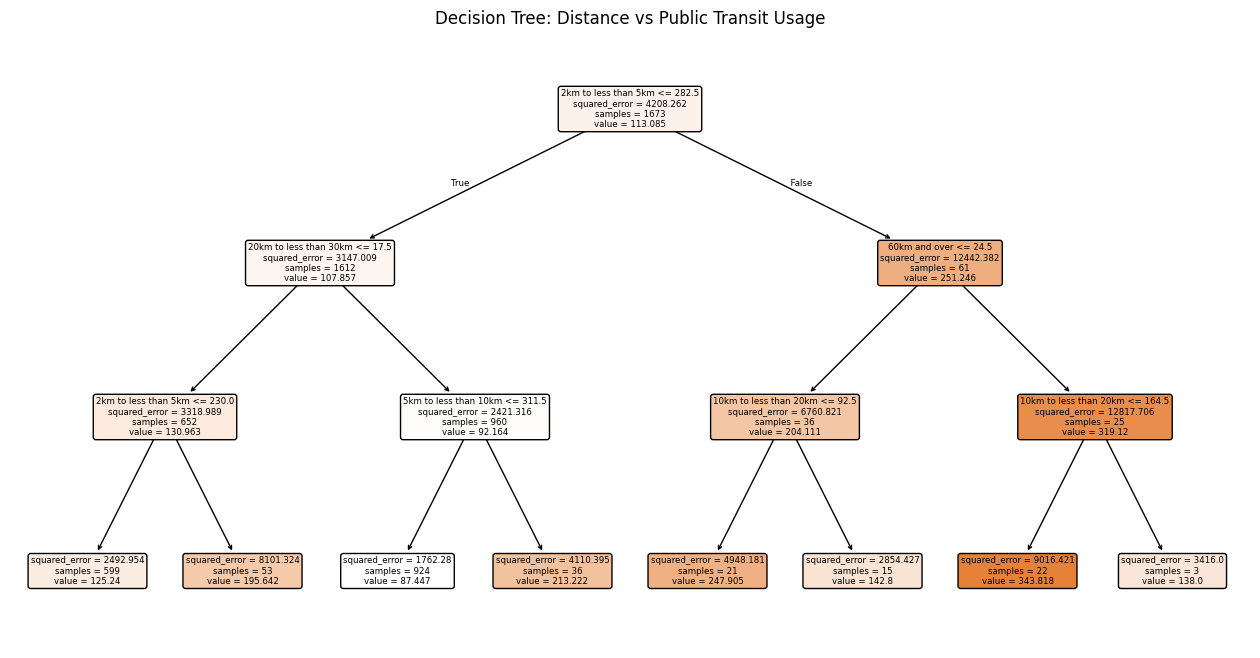

In [11]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Use distance columns as features and travel mode columns as targets
distance_cols = [
    'Less than 2km', '2km to less than 5km', '5km to less than 10km',
    '10km to less than 20km', '20km to less than 30km',
    '30km to less than 40km', '40km to less than 60km', '60km and over'
]

# Example: predict 'Public Transit' usage from distance
X = df[distance_cols]
y = df['Public Transit']

dt = DecisionTreeRegressor(max_depth=3, random_state=0)
dt.fit(X, y)

plt.figure(figsize=(16, 8))
plot_tree(dt, feature_names=distance_cols, filled=True, rounded=True)
plt.title("Decision Tree: Distance vs Public Transit Usage")
plt.show()

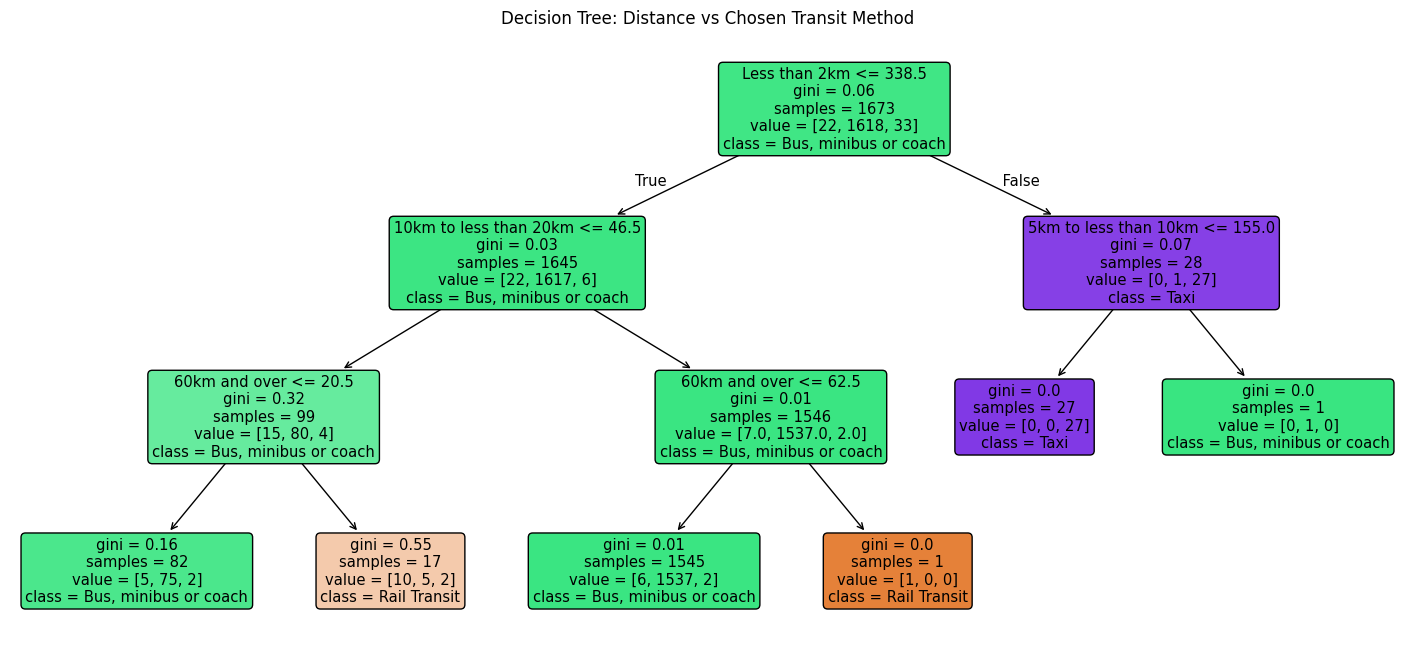

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
from matplotlib.colors import ListedColormap

# Fit a decision tree to predict travel method from distance bins

# For demonstration, predict the most likely transit_method for each row based on distance columns
# We'll use the method with the highest value among transit_method columns as the "chosen" method

# Get the columns for each method
method_cols = transit_method
# For each row, find the method with the highest value
y_method = df[method_cols].idxmax(axis=1)

# Align X and y_method to have the same indices (drop rows with NaNs in X)
X_aligned = X.dropna()
y_method_aligned = y_method.loc[X_aligned.index]

# Fit a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_aligned, y_method_aligned)

# Define a custom color map (e.g., green for nodes, blue for leaves)
cmap = ListedColormap(['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9', '#fff2ae', '#f1e2cc', '#cccccc'])

plt.figure(figsize=(18, 8))
plot_tree(
    clf,
    feature_names=distance_cols,  # distance_cols is already defined in previous cells
    class_names=method_cols,
    filled=True,
    rounded=True,
    impurity=True,
    proportion=False,
    precision=2
)
plt.title("Decision Tree: Distance vs Chosen Transit Method")
plt.show()

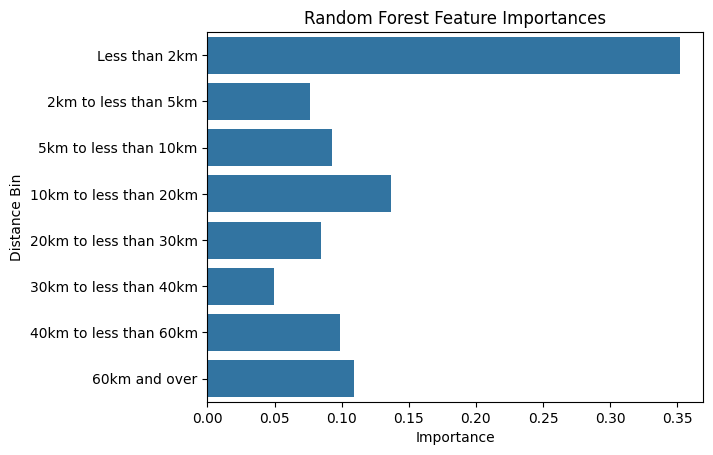

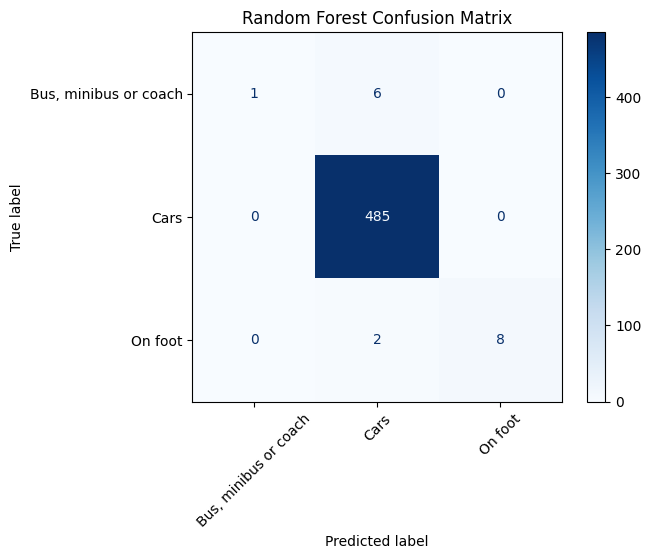

                       precision    recall  f1-score   support

Bus, minibus or coach       1.00      0.14      0.25         7
                 Cars       0.98      1.00      0.99       485
              On foot       1.00      0.80      0.89        10

             accuracy                           0.98       502
            macro avg       0.99      0.65      0.71       502
         weighted avg       0.98      0.98      0.98       502



In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import seaborn as sns

# Use the same features and target as the decision tree classifier example
X_rf = X
y_rf = y_method

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42, stratify=y_rf)

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Plot feature importances
importances = rf.feature_importances_
sns.barplot(x=importances, y=distance_cols)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Distance Bin")
plt.show()

# Plot confusion matrix
y_pred = rf.predict(X_test)
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=rf.classes_, xticks_rotation=45, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Show classification report
print(classification_report(y_test, y_pred))

Top 5 occupations for mode 'Cars':
G Wholesale and retail trade; repair of motor vehicles and motor cycles    125.385670
Q Human health and social work activities                                   99.734579
P Education                                                                 71.263551
C Manufacturing                                                             69.059813
F Construction                                                              55.927726
dtype: float64

Top 5 occupations for mode 'Public Transit':
G Wholesale and retail trade; repair of motor vehicles and motor cycles    134.68750
I Accommodation and food service activities                                119.81250
Q Human health and social work activities                                   82.37500
P Education                                                                 73.96875
N Administrative and support service activities                             50.37500
dtype: float64

Top 5 occupations for mode 'Activ

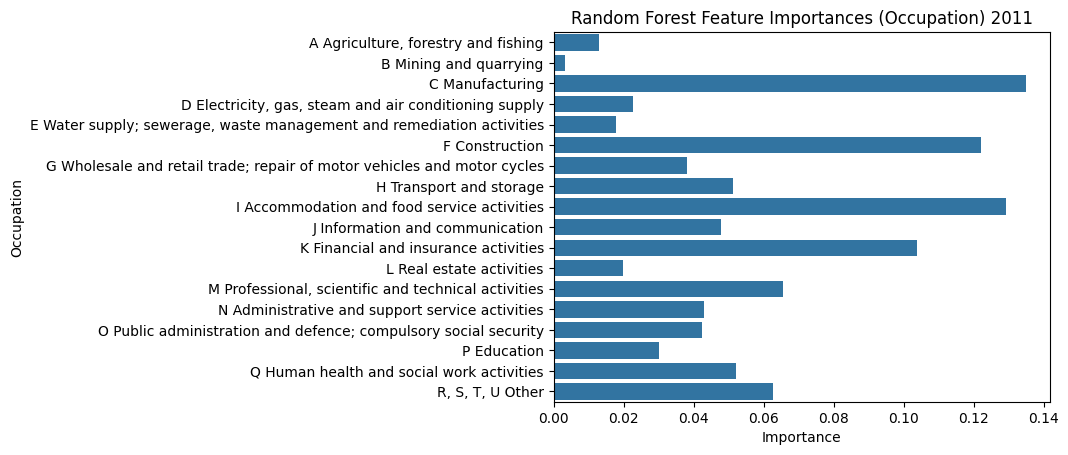

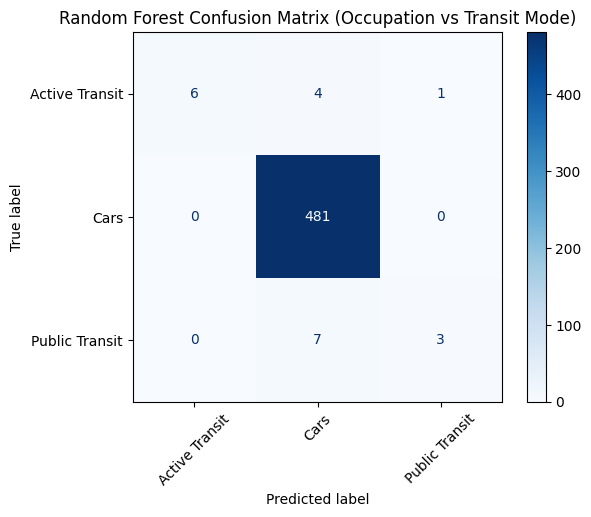

                precision    recall  f1-score   support

Active Transit       1.00      0.55      0.71        11
          Cars       0.98      1.00      0.99       481
Public Transit       0.75      0.30      0.43        10

      accuracy                           0.98       502
     macro avg       0.91      0.62      0.71       502
  weighted avg       0.97      0.98      0.97       502



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import seaborn as sns

import matplotlib.pyplot as plt

# Select occupation columns (example: columns containing 'occupation')
occupation_cols = [
    'A Agriculture, forestry and fishing',
    'B Mining and quarrying',
    'C Manufacturing',
    'D Electricity, gas, steam and air conditioning supply',
    'E Water supply; sewerage, waste management and remediation activities',
    'F Construction',
    'G Wholesale and retail trade; repair of motor vehicles and motor cycles',
    'H Transport and storage',
    'I Accommodation and food service activities',
    'J Information and communication',
    'K Financial and insurance activities',
    'L Real estate activities',
    'M Professional, scientific and technical activities',
    'N Administrative and support service activities',
    'O Public administration and defence; compulsory social security',
    'P Education',
    'Q Human health and social work activities',
    'R, S, T, U Other'
]
X_occ = df[occupation_cols]
y_occ = y_mode  # Keep all four general transit modes without filtering
X_occ = X_occ.loc[y_occ.index]  # Align X_occ with filtered y_occ

# Remove rows with missing values
X_occ = X_occ.dropna()
# For each transit mode, show top 5 occupations by feature importance
importances = rf_occ.feature_importances_
feature_importance_df = pd.DataFrame({
    'occupation': occupation_cols,
    'importance': importances
}).sort_values('importance', ascending=False)

# Get unique modes in the target
modes = y_occ.unique()
for mode in modes:
    # Get indices where this mode is the target in y_occ_aligned
    idx = y_occ_aligned[y_occ_aligned == mode].index
    # Calculate mean occupation values for this mode
    mean_occ = X_occ.loc[idx].mean()
    # Get top 5 occupations for this mode
    top5 = mean_occ.sort_values(ascending=False).head(5)
    print(f"Top 5 occupations for mode '{mode}':")
    print(top5)
    print()
y_occ_aligned = y_occ.loc[X_occ.index]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_occ, y_occ_aligned, test_size=0.3, random_state=42, stratify=y_occ_aligned)

# Fit random forest
rf_occ = RandomForestClassifier(n_estimators=100, random_state=42)
rf_occ.fit(X_train, y_train)

# Feature importances
importances = rf_occ.feature_importances_
sns.barplot(x=importances, y=occupation_cols)
plt.title("Random Forest Feature Importances (Occupation) 2011")
plt.xlabel("Importance")
plt.ylabel("Occupation")
plt.show()

# Confusion matrix
y_pred = rf_occ.predict(X_test)
ConfusionMatrixDisplay.from_estimator(rf_occ, X_test, y_test, display_labels=rf_occ.classes_, xticks_rotation=45, cmap='Blues')
plt.title("Random Forest Confusion Matrix (Occupation vs Transit Mode)")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Select target as "Work mainly at or from home"
mode_wfh = 'Work mainly at or from home'
y_wfh = y_occ_aligned == mode_wfh  # Binary classification: whether it is work from home

# Check if there are any samples for "Work mainly at or from home"
if y_wfh.sum() == 0:
    print("No samples of 'Work mainly at or from home' in the data, cannot perform analysis.")
else:
    # Binary classification: whether the mode is "Work mainly at or from home"
    # Use the same features as X_occ_aligned
    rf_wfh = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_wfh.fit(X_occ, y_wfh)

    # Feature importances
    importances_wfh = rf_wfh.feature_importances_
    feature_importance_wfh = pd.DataFrame({
        'occupation': occupation_cols,
        'importance': importances_wfh
    }).sort_values('importance', ascending=False)

    # Visualization
    sns.barplot(x='importance', y='occupation', data=feature_importance_wfh)
    plt.title("Random Forest Feature Importances for Work From Home")
    plt.xlabel("Importance")
    plt.ylabel("Occupation")
    plt.show()

    print(feature_importance_wfh.head(10))

数据中没有 'Work mainly at or from home' 的样本，无法进行分析。
